<img src="./assets/agri-bg.jpg" alt="">
<p style="color: #636363; font-size: 0.75rem; font-style: italic; text-align: center;">Photo by Elizabeth  Tamara:
<a>https://www.pexels.com/photo/view-of-a-field-19239387/</a></p> 
<h1 style="text-align: center; font-size: 2.5rem; font-weight: bold; margin: 2.5rem 0 1rem;">Predicting Crop Types Using Soil and Environmental Features</h1>
<h2 style="text-align: center; font-size: 1rem; font-weight: 500; margin: 0 0 2rem;">Gradient Boosting, SVR, Naive Bayes</h2>

This machine learning project aims to classify crop types using various soil and environmental features, including nitrogen, phosphorus, potassium content, temperature, humidity, pH level, and rainfall. By applying classification algorithms such as Naive Bayes, Gradient Boosting, and SVM (RBF), the project seeks to develop an accurate predictive model to assist in agricultural decision-making. The models were evaluated based on their precision, recall, and F1-scores, with Naive Bayes showing superior performance in classifying certain crops, particularly jute and rice. The results highlight the model's potential to improve resource management, enhance crop yield predictions, and support sustainable agricultural practices, aligning with global food security goals under the UN’s Sustainable Development Goals (SDGs).
<br><br>
<h2 style='font-size: 1rem;'>DATASET SOURCE: <a style='font-weight: 400;'>https://www.kaggle.com/datasets/chitrakumari25/smart-agricultural-production-optimizing-engine</a></h2>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Imports</h2>

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./data/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">SDG Relevance and Objectives</h2>

<div>
    <img src="./assets/sdg2.png" alt="" width="250" height="250">
    <img src="./assets/sdg12.png" alt="" width="250" height="250">
    <img src="./assets/sdg13.png" alt="" width="250" height="250">
    <img src="./assets/sdg15.png" alt="" width="250" height="250">
</div>

* **SDG 2: Zero Hunger** - By accurately predicting the most suitable crop type based on environmental factors such as nitrogen, phosphorus, potassium, temperature, and rainfall, your project can help farmers make data-driven decisions, improving crop yields and reducing the risk of crop failure. This contributes to food security and the goal of ending hunger.

* **SDG 12: Responsible Consumption and Production** - Your project encourages the efficient use of resources like water, nutrients, and land by identifying crops that are best suited to specific environmental conditions. This aligns with sustainable farming practices, minimizing waste, and promoting the responsible consumption of resources.

* **SDG 13: Climate Action** - By considering environmental features like temperature and rainfall, your model can help farmers adapt to changing climate conditions. Predicting the best-suited crops for various conditions helps mitigate the impact of climate change on agriculture, which is crucial for both adaptation and resilience.

* **SDG 15: Life on Land** - Proper crop selection based on environmental factors promotes better land use and helps avoid the degradation of soil health. Your model indirectly supports sustainable land management by ensuring that crops are chosen to match the local environmental capacity, protecting ecosystems and biodiversity.

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Structural Analysis of the Dataset</h2>

The given dataset contains a total of **2200 rows** (samples) and **8 columns** (variables). The dataset mostly represents numerical data except for the target variable, 'label'. With this, no further data encoding is needed in the project's feature engineering section.

In [8]:
record_count = df.shape[0]
column_count = df.shape[1]

print(f'Total Number of Records: {record_count}')
print(f'Total Number of Columns: {column_count}')

Total Number of Records: 2200
Total Number of Columns: 8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Statistical Analysis of the Dataset</h2>

To progress in the EDA, we need to analyze the different statistical values that correspond to the given dataset. 

In [11]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
df.describe(include=object)

,label
count,2200
unique,22
top,rice
freq,100


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Handling Null Values</h2>

The given dataset does not have any null values in any of the data points. Therefore, no further data manipulation is needed to be performed.

In [14]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Checking for Duplicate Records</h2>

The dataset does not have any duplicate records, indicating that each record is **unique** and contributes differently to the overall structure of the data.

In [16]:
dup_records = df.duplicated().sum()
print(f"Number of Duplicate Records: {dup_records}")

Number of Duplicate Records: 0


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Normalizing Dataset Columns</h2>

In normalizing data column names, we should follow the **snake_case** naming convention which is widely used in Python to label variables and such.

In [18]:
df.rename(columns={
    'N': 'nitrogen_content',
    'P': 'phosphorus_content',
    'K': 'potassium_content',
    'ph': 'ph_level',
    'label': 'crop_type'
}, inplace=True)

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Exploratory Data Analysis (EDA)</h1>

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Univariate Analysis</h2>

In [23]:
# Feature Segregation
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = df.select_dtypes(include=['number']).columns.tolist()

print(f"Number of Numerical Features: {len(num_features)}")
print(f"Number of Categorical Features: {len(cat_features)}")

# Subplot visulization preparation
num_features.extend(['', ''])
reshaped_num_features = np.array(num_features).reshape(3, 3)

Number of Numerical Features: 7
Number of Categorical Features: 1


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Data Distribution</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

To start, we should analyze the distribution of each sample over each column in the dataset. Here the observations are:

* The data in nitrogen, phosphorus and potassium content, and rainfall are **left-skewed**.
* Data in temperature and pH level are **normally distributed**.
* Datapoints in humidity are **right-skewed**.

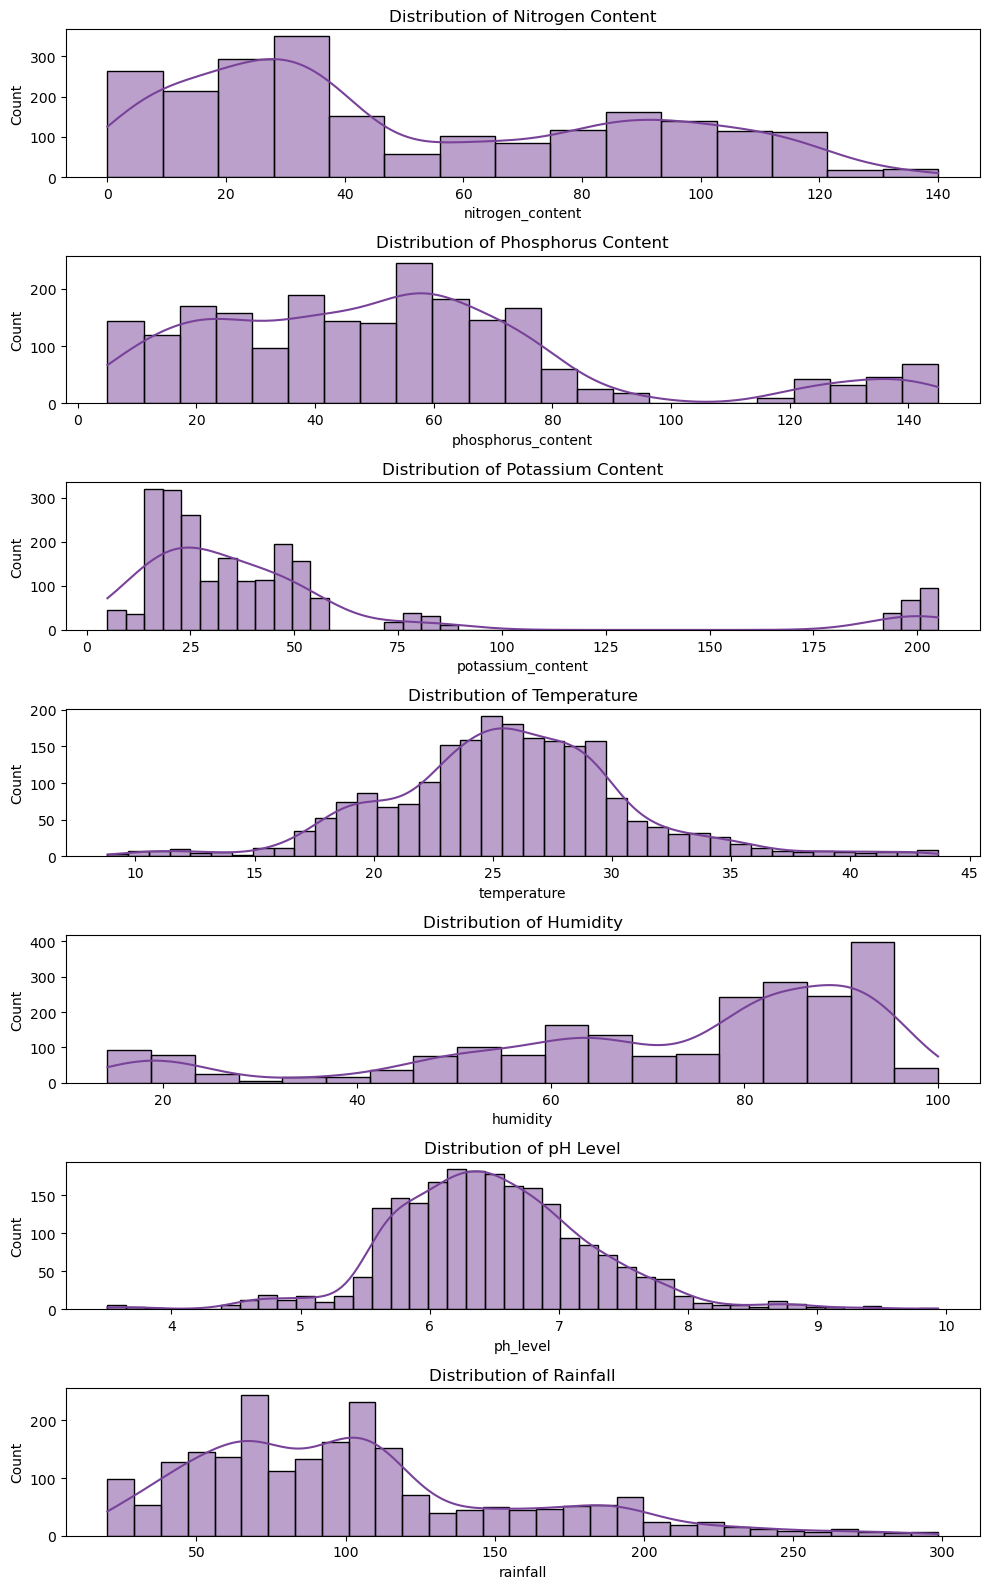

In [25]:
num_feature_names = ['Nitrogen Content', 'Phosphorus Content', 'Potassium Content', 'Temperature', 'Humidity', 'pH Level', 'Rainfall']
fig, axes = plt.subplots(nrows=len(num_features)-2, ncols=1, figsize=(10, 16))

for i in range(len(num_features[:-2])):
        sns.histplot(x=df[num_features[i]], kde=True, ax=axes[i], color='#784299')
        axes[i].set_title(f'Distribution of {num_feature_names[i]}')
    
plt.tight_layout()
plt.show()

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Outlier Removal</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In order to ensure that our model does not capture unnecessary noise, we should analyze the **presence of outliers** in each of the columns in the dataset. Using **boxplot** visualization, we can effectively determine if outliers are present among the datapoints in reference to each variable.

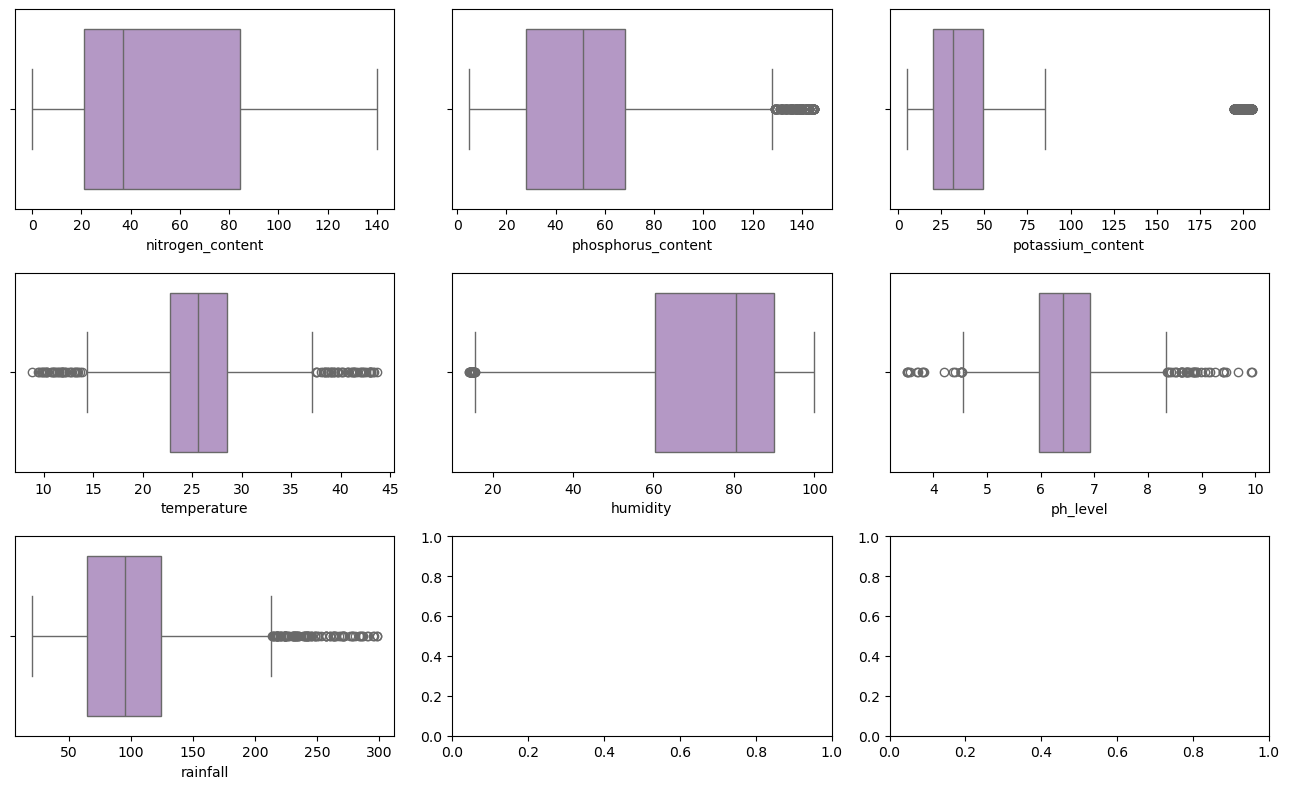

In [27]:
# RAW DATASET: Dataset may contain many outliers that can distort the predictive ability of the model

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
for i in range(len(reshaped_num_features)):
    for j in range(len(reshaped_num_features[i])):
        if reshaped_num_features[i][j]:
            sns.boxplot(x=df[reshaped_num_features[i][j]], ax=axes[i,j], color='#b691cc')

plt.tight_layout()
plt.show()

In [28]:
print('NUMBER OF OUTLIERS')
for i in num_features[:-2]:
    feature = df[i]
    
    # Calculate quartiles
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Count the existing outliers
    outliers = 0
    for point in feature:
      if point < lower_threshold or point > upper_threshold:
        outliers += 1
    
    print(f"{i}:", outliers)
    
    # Removal of outliers
    df = df[(df[i] >= lower_threshold) & (df[i] <= upper_threshold)]

# Reset index of dataframe after removal
df.reset_index(drop=True, inplace=True)

NUMBER OF OUTLIERS
nitrogen_content: 0
phosphorus_content: 138
potassium_content: 62
temperature: 58
humidity: 0
ph_level: 58
rainfall: 38


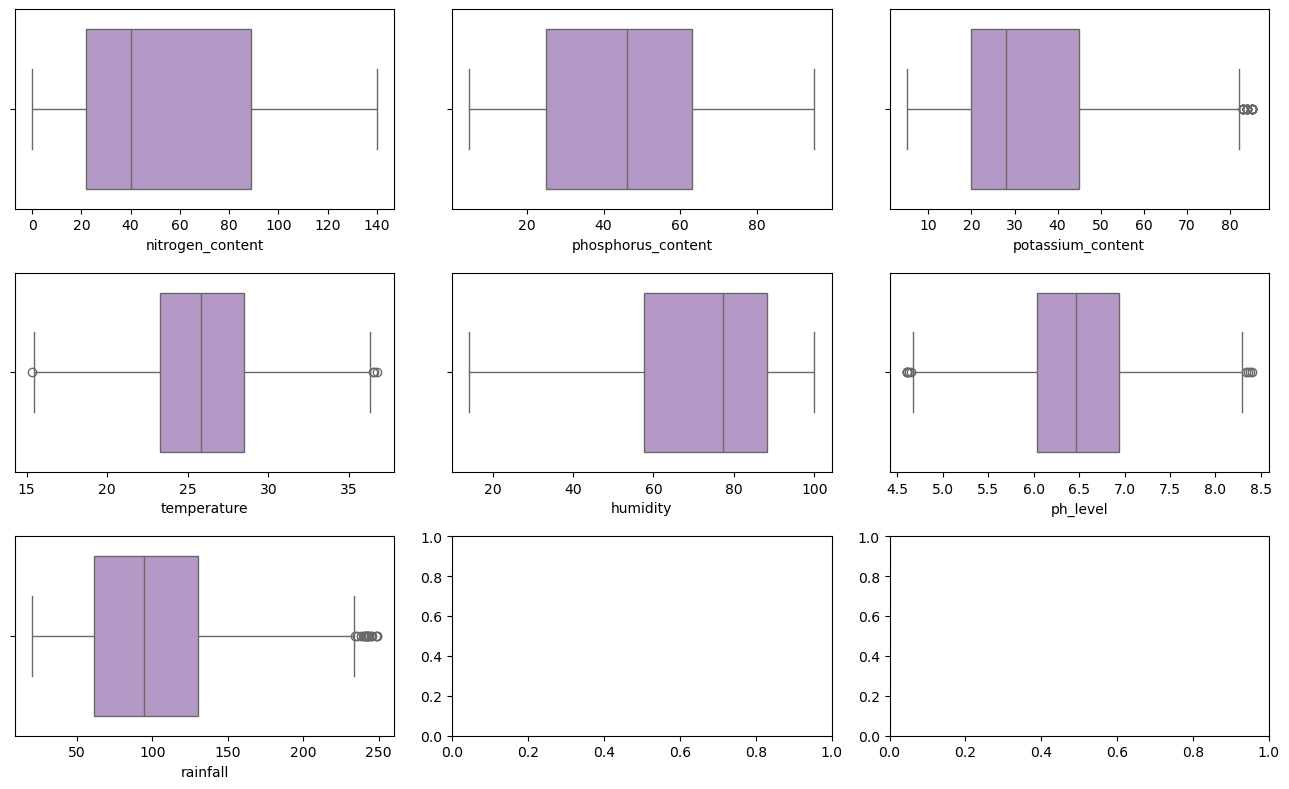

In [29]:
# CLEAN DATASET: Most outliers captured by IQR are removed

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
for i in range(len(reshaped_num_features)):
    for j in range(len(reshaped_num_features[i])):
        if reshaped_num_features[i][j]:
            sns.boxplot(x=df[reshaped_num_features[i][j]], ax=axes[i,j], color='#b691cc')

plt.tight_layout()
plt.show()

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Bivariate Analysis</h2>

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Data Distribution</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

Below is a set of barplot visualizations that shows the distribution of data in each crop type based on each independent variable. Here are the findings:

* **Nitrogen Content**: Crops that naturally have high nitrogen content are rice, maize, banana, watermelon, muskmelon, cotton, jute, and coffee.
* **Phosphorus Content**: Crops that have high phosphorus content are chickpea, kidneybeans, pigeonpeas, blackgram, lentil, banana, and papaya.
* **Potassium Content**: **Chickpea** has the highest potassium content out of any other crop. Other crops that fall in the moderate range include rice, pomegranate, banana, watermelon, muskmelon, and papaya.
* **Temperature**: All available crop types have similar desired soil temperature levels of around **20 degrees fahrenheit**. The lowest valued crop type for this category is chickpea.
* **Humidity**: Most crop types prefer high humidity levels. However, certain crop types like chickpea and kidneybeans have a notably low preferred humidity level.
* **pH Level**: All crop types desire the same pH level of approximately **6**.
* **Rainfall**: Among other crop types, **Rice** has a huge reliance over rainfall. Some other crops that also have moderate rainfall needs are pigeonpeas, papaya, coconut, jute, and coffee.

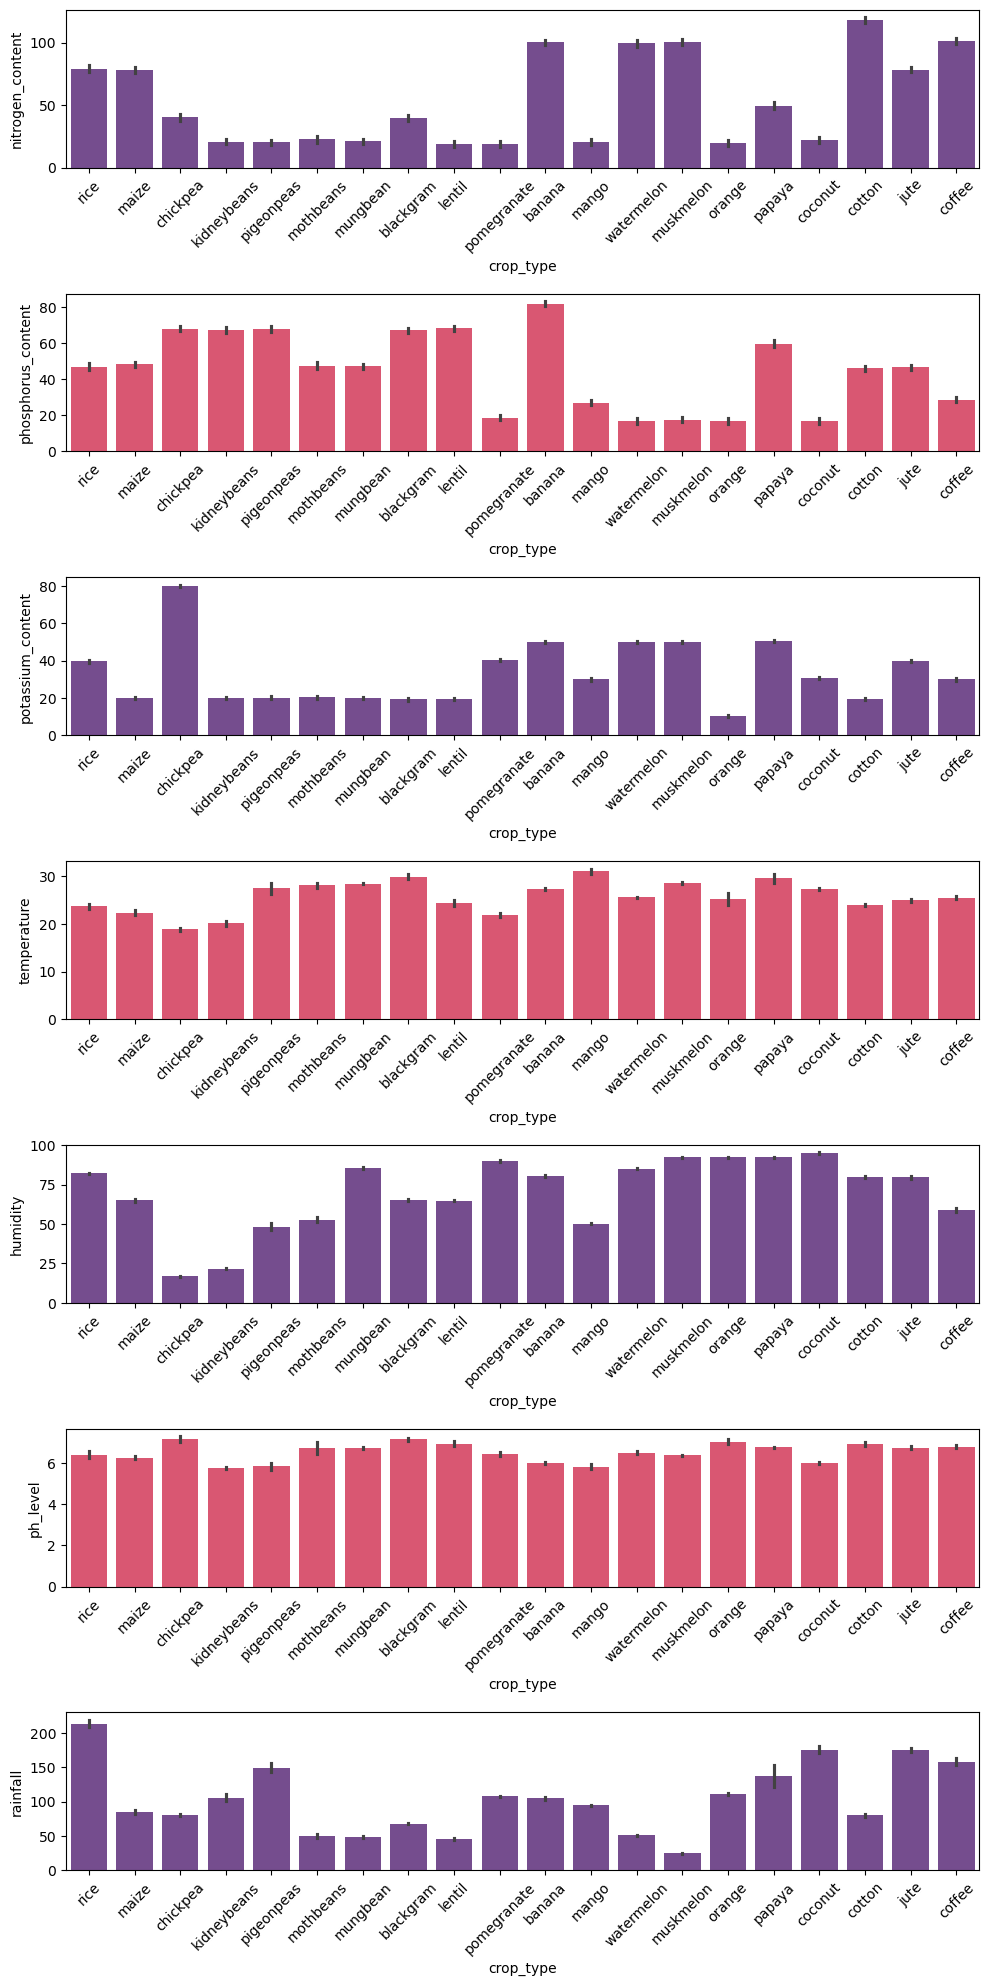

In [32]:
fig, axes = plt.subplots(nrows=len(num_features)-2, ncols=1, figsize=(10, 20))

sns.barplot(x='crop_type', y='nitrogen_content', data=df, ax=axes[0], color='#784299')
sns.barplot(x='crop_type', y='phosphorus_content', data=df, ax=axes[1], color='#ee4266')
sns.barplot(x='crop_type', y='potassium_content', data=df, ax=axes[2], color='#784299')
sns.barplot(x='crop_type', y='temperature', data=df, ax=axes[3], color='#ee4266')
sns.barplot(x='crop_type', y='humidity', data=df, ax=axes[4], color='#784299')
sns.barplot(x='crop_type', y='ph_level', data=df, ax=axes[5], color='#ee4266')
sns.barplot(x='crop_type', y='rainfall', data=df, ax=axes[6], color='#784299')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Multivariate Analysis</h2>

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Correlational Heatmap</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

The heatmap visualization below indicates the cross mapping of variables in terms of the their corresponding degree of correlation. In most mapping instances, the dependent variables are not as linearly correlated to each other. The only notable variable correlations **only indicate low to moderate correlation** which are the following:

* Phosphorus Content & Humidity (-0.48)
* Nitrogen Content & Humidity (0.26)
* Temperature & Humidity (0.3)

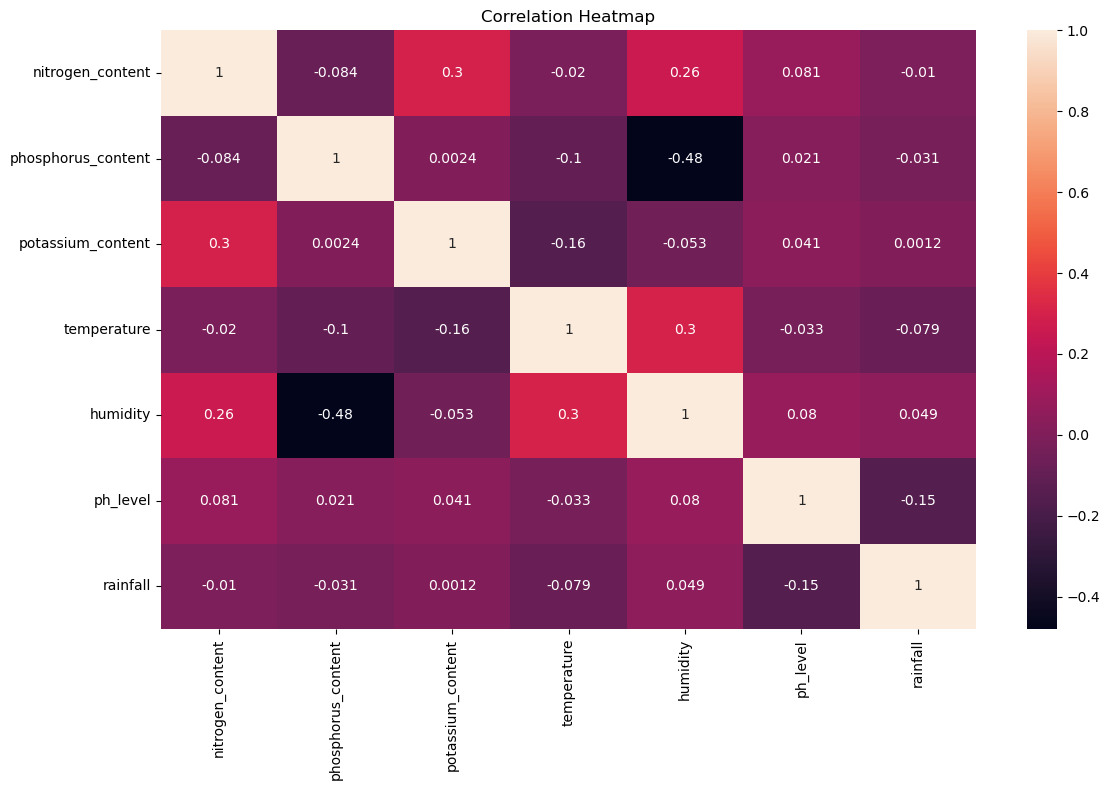

In [35]:
quant_corr = df[num_features[:-2]]
correlation_matrix = quant_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Feature Engineering</h1>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Selection</h2>

Each independent numerical variable in the dataset has its importance in the model's prediction ability based on the following domain knowledge:

* **Nitrogen, Phosphorus, Potassium**: These are essential nutrients for plant growth and directly influence soil fertility, which varies by crop.

* **Temperature and Humidity**: Different crops thrive in specific temperature and humidity ranges, so these features help model environmental suitability.

* **pH level**: Soil pH affects nutrient availability and crop tolerance, making it important for predicting which crops will do well in certain soil conditions.

* **Rainfall**: Water availability is crucial for crops, and rainfall impacts the water supply, which varies by crop type.

In [39]:
# Remove raw categorical and target variables
X = df.drop(columns=['crop_type'])
y = df['crop_type']

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Scaling</h2>

It is also important to scale the datapoint values of each feature in this case because of their varying value ranges. Please refer to df.describe() listed previously to see the corresponding statistics of the dataset.

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Splitting the Dataset</h2>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Model Training</h1>

<h2 style="padding: 0.75rem 0.5rem; background-color: #513d5c; color: white; text-align: center;">Gradient Boosting Classifier</h2>

In [47]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Accuracy Score</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [49]:
gb_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {gb_accuracy * 100:.2f}%")

Model Accuracy: 98.92%


<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Classification Report</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [51]:
gb_class_report = classification_report(y_test, y_pred)
print("Gradient Boosting Classifier - Classification Report:\n", gb_class_report)

Gradient Boosting Classifier - Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      0.96      0.98        27
      cotton       1.00      1.00      1.00        20
        jute       0.77      1.00      0.87        10
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        17
       mango       0.93      1.00      0.96        13
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        14
  pigeonpeas       1.00   

**Precision and Recall**: The model exhibits high precision and recall across most crop types, indicating it is effective in correctly identifying instances of each crop while minimizing false positives and false negatives. Notably, classes such as banana, blackgram, and chickpea show perfect scores, reflecting the model's strong performance.

**F1-Score**: The F1-scores are consistently high, with most classes achieving scores of 1.00. This suggests that the model maintains an excellent balance between precision and recall, particularly for the majority of crop types. However, classes like **jute** and **rice** show slightly lower F1-scores, indicating areas where the model's performance can be improved.

**Support**: The number of instances for each class is generally well-balanced, with no class significantly underrepresented except for **rice**, which has only 8 instances. This balance in support contributes positively to the overall effectiveness of the model, although the low support for rice may affect the reliability of its predictions.

**Overall Accuracy**: With an accuracy of **98.92%**, the model performs exceptionally well in predicting crop types, making it a reliable tool for this classification task. The high accuracy suggests that the model can be confidently used in practical applications, though attention should be given to enhancing its performance on underperforming classes like rice and jute.

<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Confusion Matrix</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

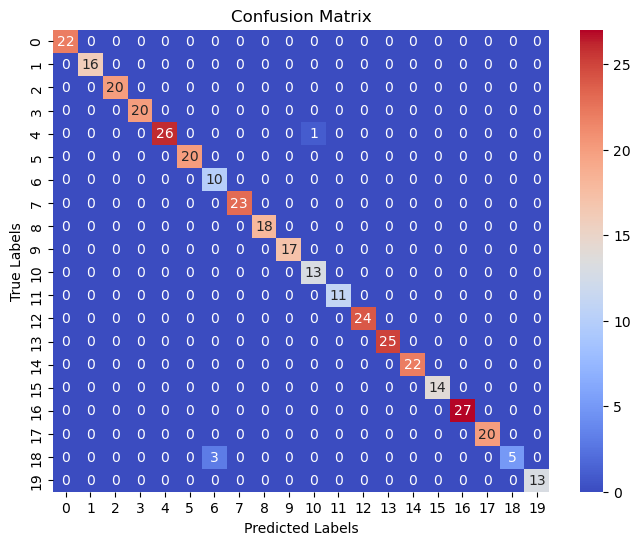

In [54]:
gb_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<h2 style="padding: 0.75rem 0.5rem; background-color: #513d5c; color: white; text-align: center;">SVM RBF</h2>

In [56]:
svr_rbf = SVC(kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)

<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Accuracy Score</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [58]:
svr_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {svr_accuracy * 100:.2f}%")

Model Accuracy: 98.92%


<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Classification Report</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [60]:
svr_class_report = classification_report(y_test, y_pred)
print("SVR Classifier - Classification Report:\n", svr_class_report)

SVR Classifier - Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        20
        jute       0.77      1.00      0.87        10
 kidneybeans       0.96      1.00      0.98        23
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        14
  pigeonpeas       1.00      0.96      0

**Precision and Recall**: The SVM model demonstrates high precision and recall across most crop types, indicating its effectiveness in accurately identifying instances of each crop while minimizing both false positives and false negatives. Classes such as banana, blackgram, chickpea, coconut, cotton, lentil, and others achieve perfect scores (1.00) in both metrics, reflecting the model's robustness.

**F1-Score**: The F1-scores are also high for the majority of classes, with most achieving scores of 1.00. This suggests a strong balance between precision and recall. Notably, classes like **coffee** and **kidneybeans** exhibit slightly lower F1-scores (0.98), indicating very good performance but with some room for improvement. The **jute class** has an F1-score of **0.86**, highlighting potential issues with correctly classifying this crop type.

**Support**: The number of instances for each class is generally well-distributed, although the **rice** class has only 8 instances. While most classes are well-supported, the low instance count for rice could impact the reliability of its predictions, as the model may not generalize well with such limited data.

**Overall Accuracy**: With an accuracy of **98.92%**, the model performs exceptionally well in predicting crop types, making it a reliable tool for this classification task. The high accuracy suggests that the model can be confidently used in practical applications, though attention should be given to enhancing its performance on underperforming classes like rice and jute.

<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Confusion Matrix</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

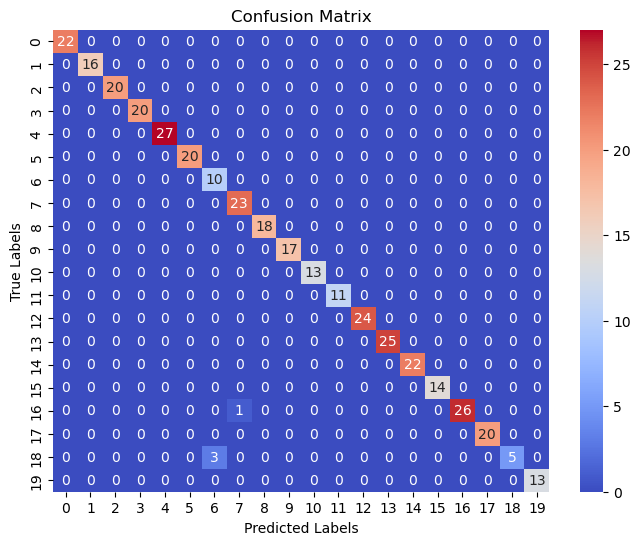

In [63]:
svr_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svr_conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<h2 style="padding: 0.75rem 0.5rem; background-color: #513d5c; color: white; text-align: center;">Naive Bayes</h2>

In [65]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Accuracy Score</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [67]:
nb_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {nb_accuracy * 100:.2f}%")

Model Accuracy: 99.73%


<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Classification Report</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [69]:
nb_class_report = classification_report(y_test, y_pred)
print("Naive Bayes - Classification Report:\n", nb_class_report)

Naive Bayes - Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        10
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        14
  pigeonpeas       1.00      1.00      1.00

**Precision and Recall**: The Naive Bayes model demonstrates exceptional precision and recall across all crop types, effectively identifying instances of each crop with minimal false positives and false negatives. Classes such as banana, blackgram, chickpea, coconut, coffee, cotton, and several others achieve perfect scores (1.00) in both metrics, indicating strong performance.

**F1-Score**: The F1-scores are consistently high, with the majority of classes achieving scores of 1.00. This reflects an excellent balance between precision and recall. The **jute** class has an F1-score of **0.95**, indicating very good performance but with some slight room for improvement. The **rice** class shows a precision of **1.00**, but a recall of 0.88, resulting in an F1-score of 0.93, which suggests that the model might miss some actual rice instances while still accurately classifying the ones it identifies.

**Support**: The support for each class is reasonably balanced, with a slight concern for the **rice** class, which only has 8 instances. While this may not significantly impact overall performance, the low instance count can affect the reliability of predictions for this class, as it may not adequately capture the variance within that crop type.

**Overall Accuracy**: The model achieves an outstanding accuracy of **99.73%**, indicating it correctly classified all instances in the dataset. This suggests that the Naive Bayes classifier is highly effective for this classification task, demonstrating strong predictive capabilities.

<div style="width: 25%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🎯 Confusion Matrix</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

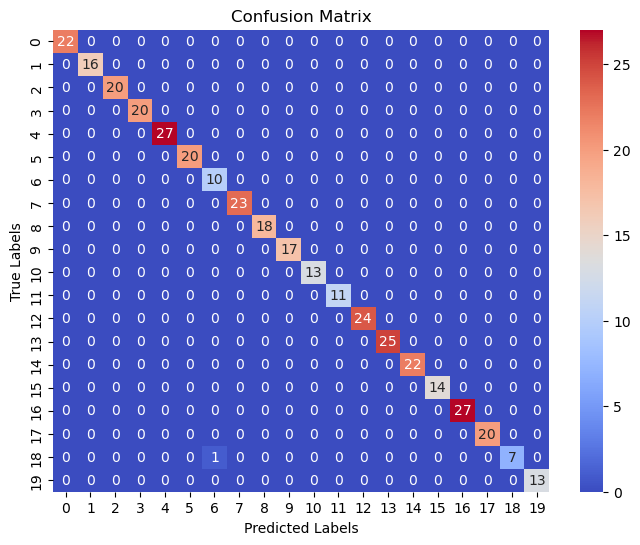

In [72]:
nb_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Model Evaluation</h1>

<div style="padding: 0.75rem 1rem; background-color: #513d5c; color: white; font-size: 1rem;">
Overall, the <span style='font-weight: bold;'>Naive Bayes model</span> performed the best out of all the models trained for the project getting an impressive score of <span style='font-weight: bold;'>99.73%</span> of accuracy. Nonetheless, the other two models also performed very well only slightly lagging behind the Naive Bayes model while having the same accuracy of <span style='font-weight: bold;'>98.82%</span>.
</div>

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🆚 Accuracy Score Comparison</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

<h3 style='font-size: 1.25rem; font-weight: 500;'>Naive Bayes (99.73% Accuracy)</h3>

<span style='font-weight: 500'>Best Performance</span>: With an accuracy of 99.73%, Naive Bayes outperforms both Gradient Boosting and SVM. This suggests that for your dataset, Naive Bayes is particularly effective at making correct predictions for the crop types.
Feature Independence: Naive Bayes assumes that features (like nitrogen content, pH, and temperature) are independent given the target variable (crop type). Despite this strong assumption, it has performed exceptionally well, which might indicate that your features have relatively low correlation or that this assumption aligns well with your dataset's structure.
<br><br>
<h3 style='font-size: 1.25rem; font-weight: 500;'>Gradient Boosting Classifier (98.92% Accuracy)</h3>

<span style='font-weight: 500'>Slightly Lower Accuracy</span>: Although Gradient Boosting has a high accuracy score, it falls slightly short of Naive Bayes. Gradient Boosting is known for building models sequentially to reduce errors from previous iterations, making it generally effective for a wide range of problems. However, in this case, it might be slightly less efficient in capturing the patterns in your data compared to Naive Bayes.
<br><br>
<h3 style='font-size: 1.25rem; font-weight: 500;'>SVM - RBF (98.92% Accuracy)</h3>

<span style='font-weight: 500'>Equal to Gradient Boosting</span>: The accuracy of the SVM with the RBF kernel is exactly the same as Gradient Boosting at 98.92%. SVM with RBF is well-suited for complex, non-linear relationships in the data. It has performed well, but the slightly lower score compared to Naive Bayes suggests it may not be as well-fitted to your dataset’s characteristics as the Naive Bayes model.
Non-linear Boundaries: SVM with RBF tries to create non-linear decision boundaries, but the dataset might not require such complexity, which could explain its marginally lower performance.
Key Takeaways:

<div style="margin: 0.1rem 0;">‎ </div>

In [79]:
model_eval_df = pd.DataFrame({
    'model_name': ['Gradient Boosting Classifier', 'SVM - RBF', 'Naive Bayes'],
    'accuracy_score': [gb_accuracy, svr_accuracy, nb_accuracy]
})

model_eval_df['accuracy_score'] = model_eval_df['accuracy_score'].apply(lambda x: float(f"{x:.5f}"))
model_eval_df.sort_values('accuracy_score', ascending=False).reset_index(drop=True)

,model_name,accuracy_score
0,Naive Bayes,0.99730
1,Gradient Boosting Classifier,0.98919
2,SVM - RBF,0.98919


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">🆚 F1 Score Comparison</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

<h3 style='font-size: 1.25rem; font-weight: 500;'>Gradient Boosting</h3>

<span style='font-weight: 500'>High Consistency</span>: Most crop types have perfect F1-scores of 1.00, reflecting an ideal balance between precision (low false positives) and recall (low false negatives). This suggests the model is very effective at classifying most crops accurately.
Areas for Improvement: The jute (F1-score of 0.87) and rice (F1-score of 0.77) classes show lower performance compared to others. This means the model struggles slightly with distinguishing these crops, potentially misclassifying them more often or missing some instances.

<h3 style='font-size: 1.25rem; font-weight: 500;'>SVM (RBF Kernel)</h3>
<span style='font-weight: 500'>Strong Performance</span>: Similar to Gradient Boosting, SVM with RBF exhibits high F1-scores for most classes, with the majority at 1.00. This indicates excellent classification with minimal trade-off between precision and recall.
Classes with Lower Scores: The jute class shows an F1-score of 0.86, meaning that the model struggles more with correctly classifying jute compared to other crops. Additionally, coffee and kidneybeans (both at 0.98) have very minor room for improvement, showing near-perfect classification.

<h3 style='font-size: 1.25rem; font-weight: 500;'>Naive Bayes</h3>
<span style='font-weight: 500'>Consistently High Scores</span>: Like the other models, Naive Bayes delivers very high F1-scores, with most classes achieving perfect 1.00 scores. This reflects its strength in handling the dataset, particularly when features are somewhat independent.
Notable Class Differences: The jute class achieves an F1-score of 0.95, which is higher than in the other models, suggesting that Naive Bayes is more effective at handling this particular crop. For rice, the F1-score is 0.93, reflecting slightly lower performance due to the recall of 0.88. While the model accurately identifies rice when it makes a prediction, it misses a small number of actual rice instances.

<h3 style='font-size: 1.25rem; font-weight: 500;'>OVERALL...</h3>

<span style='font-weight: 500'>Best Overall Performance</span>: Naive Bayes has strong, consistent F1-scores across classes and manages better than the other models in classifying jute and rice.
<br>
<span style='font-weight: 500'>Similar Performances</span>: Both Gradient Boosting and SVM have nearly identical F1-scores across most classes, except for jute, where their performance drops significantly compared to Naive Bayes.
<br>
<span style='font-weight: 500'>Areas to Improve</span>: All models could improve their classification of jute and rice, with Naive Bayes performing slightly better in these areas than the other models.

<div style="margin: 0.1rem 0;">‎ </div>